In [1]:
import yfinance as yf
import pandas as pd
from pandas import DataFrame
import time
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Stocks imported from https://finance.yahoo.com 

In [2]:
data = yf.download("AMD INTC INFY MSFT MU" ,start="2009-01-01" ,end="2019-01-01")
data.fillna(method='bfill' ,inplace=True)

[*********************100%***********************]  5 of 5 downloaded


In [3]:
data.head()

Adj Close                           Close                      \
                 AMD  INFY   INTC   MSFT    MU   AMD  INFY   INTC   MSFT   
Date                                                                       
2008-12-31      2.16  2.22  10.46  15.00  2.64  2.16  3.07  14.66  19.44   
2009-01-02      2.38  2.28  10.85  15.69  2.84  2.38  3.14  15.20  20.33   
2009-01-05      2.67  2.35  10.64  15.83  3.32  2.67  3.25  14.91  20.52   
2009-01-06      2.78  2.41  10.97  16.02  3.47  2.78  3.33  15.37  20.76   
2009-01-07      2.66  2.44  10.31  15.06  3.28  2.66  3.37  14.44  19.51   

                  ...  Open                              Volume            \
              MU  ...   AMD  INFY   INTC   MSFT    MU       AMD      INFY   
Date              ...                                                       
2008-12-31  2.64  ...  2.20  3.06  14.71  19.31  2.44  10226500   7721600   
2009-01-02  2.84  ...  2.19  3.06  14.69  19.53  2.65  13832100  14917600   
2009-01-05  3.32  ...  2.37  3.10  15.07  20.20  2.94  19326900  20835200   
2009-01-06  3.47  ...  2.75  3.25  15.09  20.75  3.40  23860000  30572000   
2009-01-07  3.28  ...  2.72  3.17  14.79  20.19  3.48  14026300  51324800   

                                           
                 INTC      MSFT        MU  
Date                                       
2008-12-31   34063800  46419000  11978200  
2009-01-02   52208200  50084000  17537200  
2009-01-05   57320400  61475200  36158500  
2009-01-06   61631400  58083400  30659700  
2009-01-07  131389200  72709900  25676100  

[5 rows x 30 columns]

In [4]:
pylab.rcParams['figure.figsize'] = (15 , 9)

# Plot historical price from 2009 to 2019

Use Adj Close as historical price

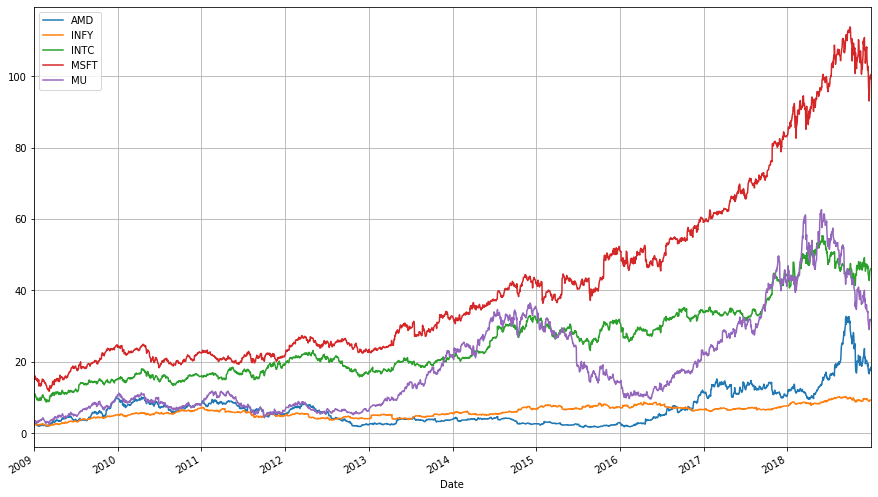

In [5]:
historical_price = data["Adj Close"]
historical_price.plot(grid = True)

# Plot simple daily returns from 2009 to 2019

To calculate simple return use formula:  r[ t ] = ( p[ t ] - p[ t-1 ] ) / p[ t-1 ]

    r = simple return from time t-1 to time t
    p = price of an asset at time t
    t = time

In [6]:
P = data["Adj Close"]
price = P.reset_index().values.tolist() #Convert dataframe and it's index to list 

In [7]:
simple_returns = list()
simple_returns_each_day = []
for t in range(len(price)):
    if t==0:
        continue #pass 2008-12-31
    simple_returns_each_day = [] 
    simple_returns_each_day.append(price[t][0])
    
    for num_stock in range(1,6):
        r = (price[t][num_stock] - price[t-1][num_stock])/price[t-1][num_stock] 
        simple_returns_each_day.append(r)
        
    simple_returns.append( simple_returns_each_day )

In [8]:
simple_returns = pd.DataFrame(simple_returns ,columns=['Date','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU']) #Convert list to dataframe
simple_returns.set_index('Date',inplace=True)

In [9]:
simple_returns

,AMD,INFY,INTC,MSFT,MU
Date,,,,,
2009-01-02,0.101852,0.027027,0.037285,0.046000,0.075758
2009-01-05,0.121849,0.030702,-0.019355,0.008923,0.169014
2009-01-06,0.041199,0.025532,0.031015,0.012003,0.045181
2009-01-07,-0.043165,0.012448,-0.060164,-0.059925,-0.054755
2009-01-08,0.030075,-0.012295,0.006790,0.031208,0.039634
...,...,...,...,...,...
2018-12-24,-0.016539,-0.002240,-0.027961,-0.041800,-0.042876
2018-12-26,0.075075,0.032548,0.059635,0.068336,0.064438
2018-12-27,-0.022905,0.007609,0.003752,0.006236,0.033668


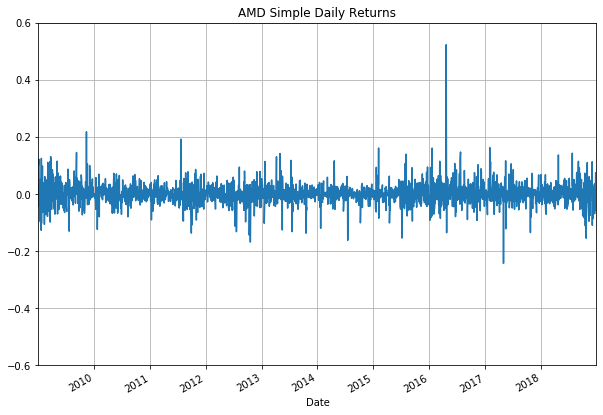

In [10]:
pylab.rcParams['figure.figsize'] = (10 ,7)
simple_returns['AMD'].plot(grid = True ,ylim=(-0.6,0.6) ,title="AMD Simple Daily Returns")

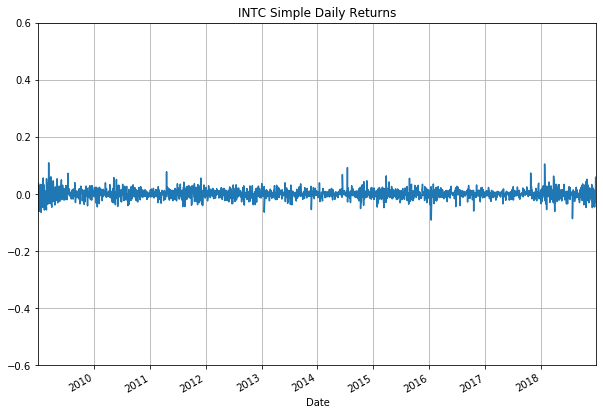

In [11]:
simple_returns['INTC'].plot(grid = True ,ylim=(-0.6,0.6) ,title="INTC Simple Daily Returns")

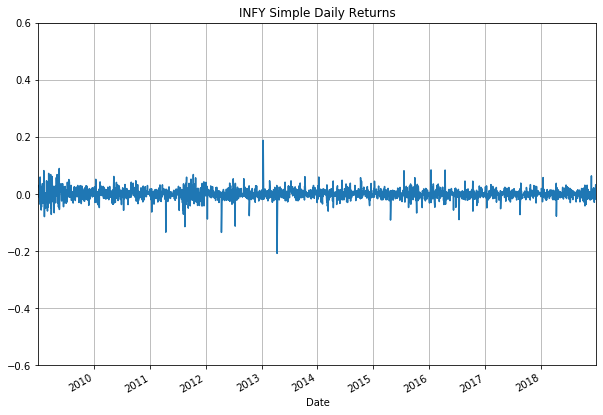

In [12]:
simple_returns['INFY'].plot(grid = True ,ylim=(-0.6,0.6) ,title="INFY Simple Daily Returns")

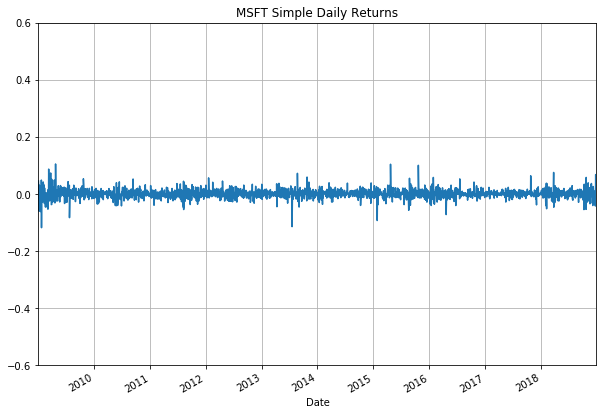

In [13]:
simple_returns['MSFT'].plot(grid = True ,ylim=(-0.6,0.6) ,title="MSFT Simple Daily Returns")

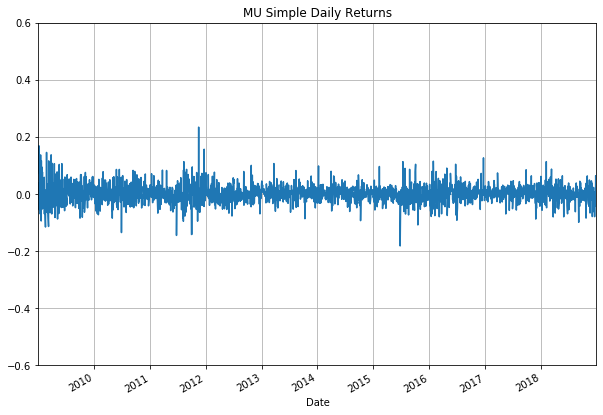

In [14]:
simple_returns['MU'].plot(grid = True ,ylim=(-0.6,0.6) ,title="MU Simple Daily Returns")

# Plot log daily returns from 2009 to 2019

To Calculate log return use fomular: r = ln ( P[ t ] / P [ t-1 ] ) = ln(P[ t ]) - ln(P[ t-1 ])

    r = simple return from time t-1 to time t
    p = price of an asset at time t
    t = time

In [15]:
# P = data["Adj Close"]
# price = P.reset_index().values.tolist() 
log_returns = list()
log_returns_each_day = []
for t in range(len(price)):
    if t==0:
        continue #pass 2008-12-31
        
    log_returns_each_day = []
    log_returns_each_day.append(price[t][0])
    
    for num_stock in range(1,6):
        r = np.log(price[t][num_stock]) - np.log(price[t-1][num_stock])
        log_returns_each_day.append(r)
        
    log_returns.append(log_returns_each_day)

In [16]:
log_returns = pd.DataFrame(log_returns ,columns=['Date','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU']) #Convert list to dataframe
log_returns.set_index('Date',inplace=True)

In [17]:
log_returns

,AMD,INFY,INTC,MSFT,MU
Date,,,,,
2009-01-02,0.096992,0.026668,0.036607,0.044973,0.073025
2009-01-05,0.114978,0.030240,-0.019545,0.008883,0.156161
2009-01-06,0.040372,0.025211,0.030544,0.011931,0.044190
2009-01-07,-0.044125,0.012371,-0.062050,-0.061796,-0.056311
2009-01-08,0.029632,-0.012371,0.006767,0.030731,0.038869
...,...,...,...,...,...
2018-12-24,-0.016677,-0.002242,-0.028359,-0.042698,-0.043822
2018-12-26,0.072390,0.032029,0.057925,0.066102,0.062447
2018-12-27,-0.023171,0.007580,0.003745,0.006216,0.033113


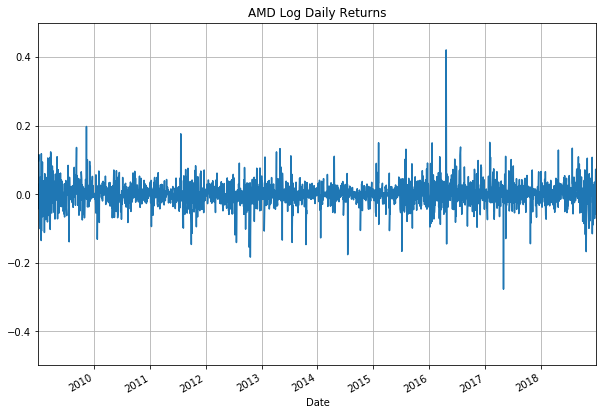

In [18]:
log_returns['AMD'].plot(grid = True ,ylim=(-0.5,0.5) ,title="AMD Log Daily Returns")

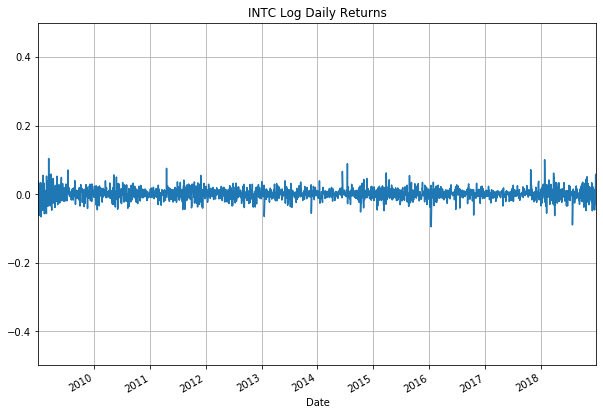

In [19]:
log_returns['INTC'].plot(grid = True ,ylim=(-0.5,0.5) ,title="INTC Log Daily Returns")

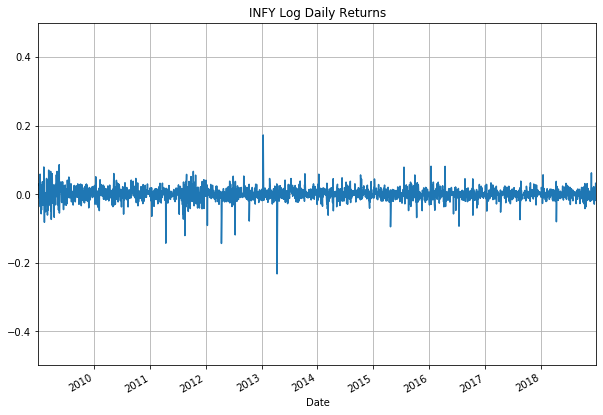

In [20]:
log_returns['INFY'].plot(grid = True ,ylim=(-0.5,0.5) ,title="INFY Log Daily Returns")

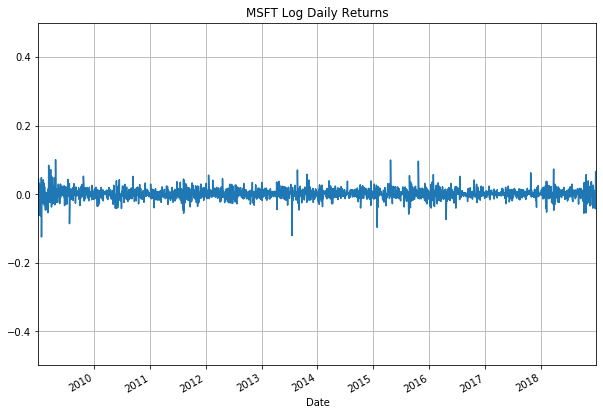

In [21]:
log_returns['MSFT'].plot(grid = True ,ylim=(-0.5,0.5) ,title="MSFT Log Daily Returns")

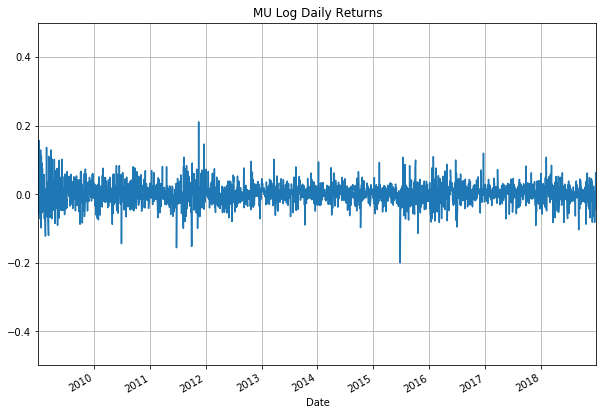

In [22]:
log_returns['MU'].plot(grid = True ,ylim=(-0.5,0.5) ,title="MU Log Daily Returns")

# Annualized Return (Average Return)

    1. Count days in each year.
    2. Calculate the annualized return for each year.
    3. Plot the annualized return for each year.
    
To calculate annualized returns use formula: Annualized Return = ((1 + R1) * (1 + R2) * (1 + R3) * ... * (1 + Rn))^(365/n)  - 1

    R = simple daily returns
    n = # days per year

In [23]:
#Set up parameters
date = simple_returns.reset_index()["Date"].dt 
year = date.year.values.tolist()
R = simple_returns.reset_index().values.tolist()
annualize = [] #To collect aunualized returns
days_per_year = [] #To check the number of days in each year
current_year = 2009
days = 0
r_each = [1,1,1,1,1]
annualize_each_year = []

In [24]:
for t in range(len(year)):
    if year[t] == current_year:
        for num_stock in range(1,6):
            r = r_each[num_stock-1] * (1 + R[t][num_stock]) #Calculates annualized returns
            r_each[num_stock-1] = r
        days = days + 1
    else: 
        annualize_each_year.append(current_year)
        for num_stock in range(1,6):
            r_each[num_stock-1] = np.power(  r_each[num_stock-1] ,(365/days)) - 1 #Calculates annualized returns
            annualize_each_year.append( r_each[num_stock-1] )
        days_per_year.append( [current_year, days] )  
        annualize.append(annualize_each_year)
        days = 0 #resets days
        current_year = current_year+1 #update current year    
        r_each = [1,1,1,1,1] #reset r_each
        annualize_each_year = [] #reset annualize_each_year

annualize_each_year.append(current_year)
for num_stock in range(1,6):
    r_each[num_stock-1] = np.power(  r_each[num_stock-1] ,(365/days)) - 1 #Calculates annualized returns
    annualize_each_year.append( r_each[num_stock-1] )
days_per_year.append( [current_year, days] ) 
annualize.append(annualize_each_year)

In [25]:
print(days_per_year)

[[2009, 252], [2010, 251], [2011, 251], [2012, 249], [2013, 251], [2014, 251], [2015, 251], [2016, 251], [2017, 250], [2018, 250]]


In [26]:
annualize = pd.DataFrame(annualize ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU']) #Convert list to dataframe

In [27]:
annualize.set_index('Year',inplace=True)
annualize

,AMD,INFY,INTC,MSFT,MU
Year,,,,,
2009,7.780663,2.307352,0.695407,0.983727,6.447857
2010,-0.219517,0.576066,0.056157,-0.113318,-0.355637
2011,-0.480336,-0.439885,0.310378,-0.068221,-0.329498
2012,-0.701883,-0.267995,-0.185156,0.037930,-0.089741
2013,0.855361,0.539496,0.403918,0.622952,4.627035
2014,-0.434199,0.355415,0.719946,0.438743,1.010232
2015,0.110756,0.112770,-0.034565,0.333560,-0.728964
2016,6.765224,-0.094667,0.152037,0.248764,0.855385
2017,-0.143431,0.247651,0.461534,0.629776,1.403940


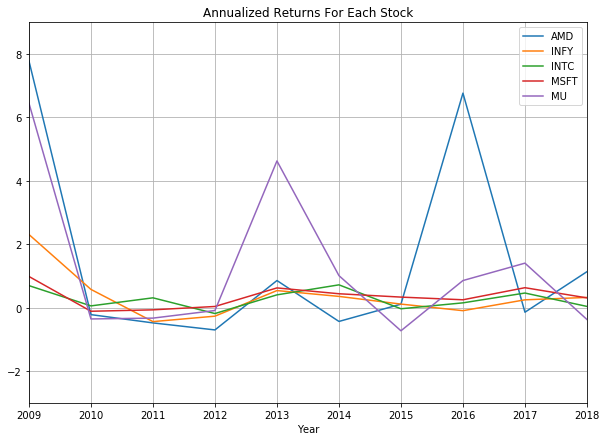

In [28]:
annualize.plot(grid = True ,ylim=(-3,9) ,title="Annualized Returns For Each Stock")

# Covariance and Correlation Coefficient of Simple Daily Returns

Use simple daily returns as daily returns.

In [29]:
simple_returns

,AMD,INFY,INTC,MSFT,MU
Date,,,,,
2009-01-02,0.101852,0.027027,0.037285,0.046000,0.075758
2009-01-05,0.121849,0.030702,-0.019355,0.008923,0.169014
2009-01-06,0.041199,0.025532,0.031015,0.012003,0.045181
2009-01-07,-0.043165,0.012448,-0.060164,-0.059925,-0.054755
2009-01-08,0.030075,-0.012295,0.006790,0.031208,0.039634
...,...,...,...,...,...
2018-12-24,-0.016539,-0.002240,-0.027961,-0.041800,-0.042876
2018-12-26,0.075075,0.032548,0.059635,0.068336,0.064438
2018-12-27,-0.022905,0.007609,0.003752,0.006236,0.033668


# Covariance

Matrix table of covariance of daily returns.

In [30]:
simple_returns.cov()

,AMD,INFY,INTC,MSFT,MU
AMD,0.001418,0.000205,0.000248,0.000186,0.000532
INFY,0.000205,0.000357,0.000125,0.000112,0.000211
INTC,0.000248,0.000125,0.000264,0.000148,0.000275
MSFT,0.000186,0.000112,0.000148,0.000244,0.000210
MU,0.000532,0.000211,0.000275,0.000210,0.001029


Heatmap

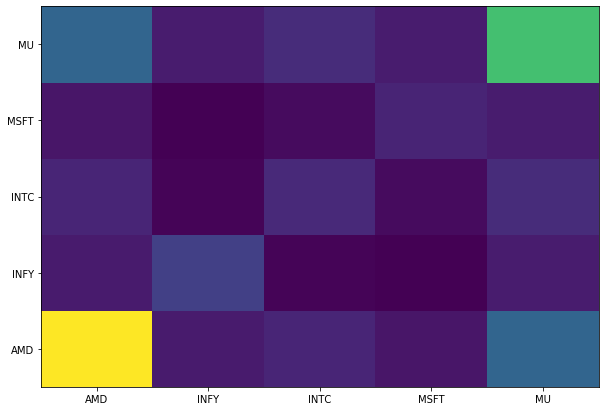

In [31]:
plt.pcolor(simple_returns.cov())
plt.yticks(np.arange(0.5, len(simple_returns.cov().index), 1), simple_returns.cov().index)
plt.xticks(np.arange(0.5, len(simple_returns.cov().columns), 1), simple_returns.cov().columns)
plt.show()

# Correlation Coefficient

Matrix table of correlation coefficience of daily returns.

In [32]:
simple_returns.corr()

,AMD,INFY,INTC,MSFT,MU
AMD,1.000000,0.288176,0.405214,0.316022,0.440009
INFY,0.288176,1.000000,0.405909,0.379104,0.348256
INTC,0.405214,0.405909,1.000000,0.581764,0.527428
MSFT,0.316022,0.379104,0.581764,1.000000,0.418657
MU,0.440009,0.348256,0.527428,0.418657,1.000000


Heatmap

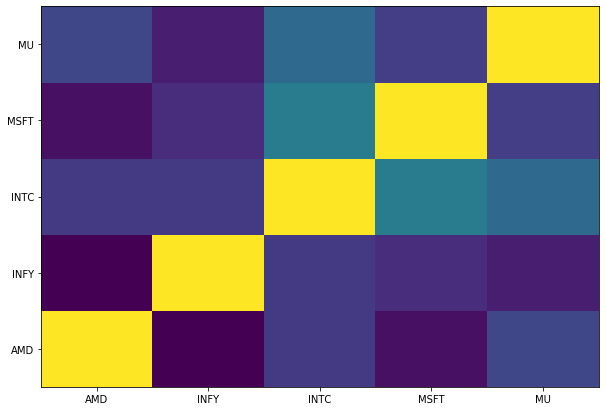

In [33]:
plt.pcolor(simple_returns.corr())
plt.yticks(np.arange(0.5, len(simple_returns.corr().index), 1), simple_returns.corr().index)
plt.xticks(np.arange(0.5, len(simple_returns.corr().columns), 1), simple_returns.corr().columns)
plt.show()

# Histogram of Daily Returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15DFCDF0>,
      dtype=object)

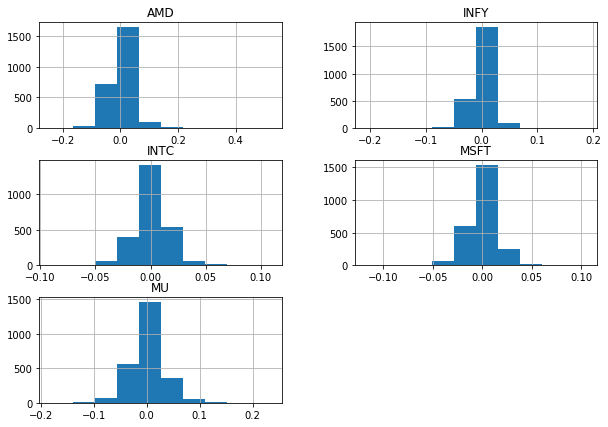

In [34]:
simple_returns.hist()

# Mean, Variance, Skewness and Kurtosis

In [35]:
cal = pd.DataFrame()
cal['Stock'] = ['AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU']
cal['Mean'] = simple_returns.mean().values.tolist()
cal['Variance'] = simple_returns.var().values.tolist()
cal['Skewness'] = simple_returns.skew().values.tolist()
cal['Kurtosis'] = simple_returns.kurtosis().values.tolist()
cal.set_index('Stock')

,Mean,Variance,Skewness,Kurtosis
Stock,,,,
AMD,0.001549,0.001418,1.111151,17.754559
INFY,0.000752,0.000357,-0.635824,14.565992
INTC,0.000721,0.000264,0.216840,4.036787
MSFT,0.000878,0.000244,0.051479,7.311674
MU,0.001501,0.001029,0.292863,3.627926


# Find Upper bound and Lowerbound of Price

Calculate ZT for each stock by
    
    𝑍𝑇 = (ln(𝑃𝑇/𝑃0) −𝜇𝑟𝑇) /𝜎𝑟 𝑇^(0.5)

In [36]:
p = data["Adj Close"]
r = log_returns
stock_name = ['AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU']
days = [5,21,63,250]
z_each_days = []
z = []
for T in range(len(days)):
    for stock in stock_name:
        z_each_days.append((np.sum(r[stock][0:days[T]-1]) - (r[stock][0:days[T]-1].mean() * days[T])) / (np.power(r[stock][1:days[T]-1].var(),0.5) * np.power(days[T],0.5)))
    z.append(z_each_days)
    z_each_days = [] # reset z_each_days

This table shows ZT for each stock using T = 5, 21, 63, 250

In [37]:
Z = pd.DataFrame(z,columns=stock_name)
Z['#days'] = days
Z.set_index(['#days'])

,AMD,INFY,INTC,MSFT,MU
#days,,,,,
5,-0.292446,-1.146498,0.034843,-0.010700,-0.228329
21,-0.002014,-0.028153,0.041053,0.033433,-0.050577
63,-0.010718,-0.005530,-0.002041,0.000000,-0.014030
250,-0.008168,-0.008331,-0.003928,-0.005374,-0.007392


To calculate lower bound and upper bound of log-normal distribution. 
    
    𝑃0exp(𝜇𝑟𝑇 − 𝑧𝜎𝑟𝑇^(0.5)) < 𝑃𝑇 < 𝑃0exp(𝜇𝑟𝑇 + 𝑧𝜎𝑟 𝑇^(0.5))
            (Lower bound)                           (Upper Bound)
        
, z = 1.96 ; -z < Zt <z

In [38]:
num_days = []
bound_stock = []
bound_up_each_days = []
bound_low_each_days = []
for stock in stock_name:
    for T in range(len(days)):
        bound_low_each_days.append(p[stock][1]*np.exp(((r[stock][0:days[T]-1]).mean()*days[T]) - (1.96*np.power(r[stock][0:days[T]-1].var(),0.5)*np.power(days[T],0.5)) ))
        bound_up_each_days.append(p[stock][1]*np.exp(((r[stock][0:days[T]-1]).mean()*days[T]) + (1.96*np.power(r[stock][0:days[T]-1].var(),0.5)*np.power(days[T],0.5)) ))
        bound_stock.append(stock)
        num_days.append(days[T])

In [39]:
bound = pd.DataFrame()
bound['#days'] = num_days
bound['stock'] = bound_stock
bound['Lower bound'] = bound_low_each_days
bound['Upper bound'] = bound_up_each_days
bound.set_index('#days')

,stock,Lower bound,Upper bound
#days,,,
5,AMD,2.256274,4.225050
21,AMD,1.218056,4.787034
63,AMD,1.233868,9.071662
250,AMD,2.509650,47.317981
5,INFY,2.479696,2.654994
21,INFY,1.874073,3.295928
63,INFY,1.465332,4.298640
250,INFY,2.396151,11.617279
5,INTC,8.695846,13.057651


# Volatility in daily historical data

Calculate historical volatility by

    𝜎0 = ((1/m)*(r1^(2)+r2^(2)+...+rt^(2))^(0.5)

In [40]:
#Set up parameters
hist_vol = []
r = log_returns
annualize_vol = [] #To collect aunualized historical volatility
#days_per_year is a array that stores the number of days in each year
#days_per_year = [ [2009,252] , [..] ,..] 
current_year = 2009
hist_vol_each_year = []

In [41]:
for t in range(len(days_per_year)):
    hist_vol_each_year.append( days_per_year[t][0] )
    for stock in stock_name:
        sum_r = np.sum(r[stock][0:days_per_year[t][1]-1])
        hist_vol_each_year.append( np.power( (1/days_per_year[t][1])*np.power(sum_r,2) ,0.5))
    hist_vol.append( hist_vol_each_year )
    hist_vol_each_year = [] #reset hist_vol_each_year

This table shows historical volatility (𝜎0) for each year.

In [42]:
Hist_vol = pd.DataFrame(hist_vol ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU'])
Hist_vol.set_index('Year')

,AMD,INFY,INTC,MSFT,MU
Year,,,,,
2009,0.094748,0.052518,0.023543,0.030778,0.087804
2010,0.095131,0.052375,0.023006,0.031711,0.086417
2011,0.095131,0.052375,0.023006,0.031711,0.086417
2012,0.096544,0.053081,0.022845,0.031040,0.085406
2013,0.095131,0.052375,0.023006,0.031711,0.086417
2014,0.095131,0.052375,0.023006,0.031711,0.086417
2015,0.095131,0.052375,0.023006,0.031711,0.086417
2016,0.095131,0.052375,0.023006,0.031711,0.086417
2017,0.095838,0.052851,0.022715,0.031339,0.084483


# The annualized historical volatility

The annualized historical volatility with respect to h period per year is given by :

    𝜎ann = (h^(0.5))*𝜎0

In [43]:
hist_vol_ann = []
annualize_each_year = []
#days_per_year is a array that stores the number of days in each year
#days_per_year = [ [2009,252] , [..] ,..] 
#Hist_vol is the historical volatility for each year.

In [44]:
for t in range(len(days_per_year)):
    annualize_each_year.append(days_per_year[t][0])
    for stock in stock_name: 
        annualize_each_year.append(np.power(days_per_year[t][1],0.5)*Hist_vol[stock][t])
    hist_vol_ann.append(annualize_each_year)
    annualize_each_year = []

This table shows annualized historical volatility (𝜎ann) for each year.

In [45]:
Hist_vol_ann = pd.DataFrame(hist_vol_ann ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU'])
Hist_vol_ann.set_index('Year')

,AMD,INFY,INTC,MSFT,MU
Year,,,,,
2009,1.504077,0.833692,0.373737,0.488580,1.393842
2010,1.507159,0.829771,0.364484,0.502390,1.369102
2011,1.507159,0.829771,0.364484,0.502390,1.369102
2012,1.523436,0.837598,0.360492,0.489806,1.347680
2013,1.507159,0.829771,0.364484,0.502390,1.369102
2014,1.507159,0.829771,0.364484,0.502390,1.369102
2015,1.507159,0.829771,0.364484,0.502390,1.369102
2016,1.507159,0.829771,0.364484,0.502390,1.369102
2017,1.515331,0.835647,0.359158,0.495509,1.335798


# Range-based volatility by Parkinson

To calculate range-based volatility by parkingson is given by :

    𝜎𝑝 = (1 / 4ln2 ∙ 1/𝑚 ∙ (ln (𝐻1/𝐿1)^2 + ln (𝐻2/𝐿2)^2 + ... + ln (𝐻𝑘/𝐿𝑘)^2 ) )
    k = The number of days per year

In [46]:
H = data['High']
L = data['Low']
#days_per_year is a array that stores the number of days in each year
#days_per_year = [ [2009,252] , [..] ,..] 
vol_park = []
vol_park_each_year = []

In [47]:
for t in range(len(days_per_year)):
    vol_park_each_year.append(days_per_year[t][0])
    for stock in stock_name: 
        sum_para = np.sum(np.log(np.power(H[stock][t]/L[stock][t],2)))
        vol_park_each_year.append( np.power(((1/(4*np.log(2))) * (1/days_per_year[t][1]) * sum_para),0.5) )
    vol_park.append(vol_park_each_year)
    vol_park_each_year = []

In [48]:
Vol_park = pd.DataFrame(vol_park ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU'])
Vol_park.set_index('Year')

,AMD,INFY,INTC,MSFT,MU
Year,,,,,
2009,0.010935,0.007492,0.008362,0.007763,0.017025
2010,0.018034,0.011412,0.012284,0.012202,0.016759
2011,0.019433,0.012387,0.009574,0.009278,0.023470
2012,0.017950,0.011485,0.009025,0.007369,0.015989
2013,0.013619,0.018563,0.011866,0.010820,0.017454
2014,0.015874,0.010147,0.007989,0.009622,0.014417
2015,0.014513,0.012817,0.010793,0.011351,0.015457
2016,0.016388,0.011859,0.011833,0.008488,0.017565
2017,0.014344,0.012653,0.012349,0.008286,0.019629


# Range-based volatility by Garman and Klass

To calculate range-based volatility by Garman and Klass is given by :

    𝜎𝑔𝑘 = ( 1/𝑚 sum( (1/2 ∙ ln(𝐻𝑘/𝐿𝑘)^(2) ) − (2 ln 2 − 1) ln(𝐶𝑘/𝑂𝑘)^(2) )^(0.5)

In [49]:
# H = data['High'] -->was declared.
# L = data['Low']
C = data['Close']
O = data['Open']
#days_per_year is a array that stores the number of days in each year
#days_per_year = [ [2009,252] , [..] ,..] 
vol_gar_klass = []
vol_gar_klass_each_year = []

In [50]:
for t in range(len(days_per_year)):
    vol_gar_klass_each_year.append(days_per_year[t][0])
    for stock in stock_name: 
        sum_para = np.sum((0.5*np.log(np.power(H[stock][t]/L[stock][t],2))) - (((2*np.log(2))-1)*np.log(np.power(C[stock][t]/O[stock][t],2))))
        vol_gar_klass_each_year.append( np.power(((1/days_per_year[t][1]) * sum_para),0.5) )
    vol_gar_klass.append(vol_gar_klass_each_year)
    vol_gar_klass_each_year = []

In [51]:
Vol_gar_klass = pd.DataFrame(vol_gar_klass ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU'])
Vol_gar_klass.set_index('Year')

,AMD,INFY,INTC,MSFT,MU
Year,,,,,
2009,0.014900,0.008235,0.010362,0.007936,0.012660
2010,0.013956,0.010055,0.010204,0.009102,0.013275
2011,0.012516,0.008201,0.012646,0.008424,0.019735
2012,0.020323,0.010364,0.007475,0.008590,0.017064
2013,0.018049,0.017011,0.016398,0.016364,0.024586
2014,0.015325,0.011947,0.008201,0.007242,0.009617
2015,0.020109,0.018120,0.015992,0.016717,0.020129
2016,0.023943,0.013261,0.016601,0.011730,0.024270
2017,0.018351,0.014591,0.013902,0.006931,0.021787


# Time dependent weighted volatility

This is the Exponential Weighted Moving Average (EWMA) model for the variance.

    𝜎𝑒𝑤𝑚𝑎^(2) (𝑡) = (1 − λ) ∙ sum(λ^(𝑘−1) ∙ 𝑟(𝑡−𝑘)^(2) )
    
A good decay factor for developed markets has been estimates by J.P. Morgan’s RiskMetrics methodology to be λ=0.94.

In [108]:
r = log_returns
lamdha = []
lamdha_each_year = []
ewma = []
ewma_each_year = []
date = simple_returns.reset_index()["Date"].dt 
year = date.year.values.tolist()

In [109]:
for t in range(len(days_per_year)):
    for k in range(1,days_per_year[t][1]+1):
        lamdha_each_year.append(np.power(0.94,k-1))
    lamdha.append([days_per_year[t][0],lamdha_each_year])
    lamdha_each_year = []

In [110]:
L = pd.DataFrame(lamdha,columns=['Year','lamdha'])
L = L.set_index('Year')
L = L.transpose()

In [111]:
total_days = 0
sum_ = 0
for t in range(len(days_per_year)):
    total_days = total_days + days_per_year[t][1]
    ewma_each_year.append(days_per_year[t][0])
    for stock in stock_name: 
        for k in range(days_per_year[t][1]):
            sum_ = sum_ + (L[days_per_year[t][0]][0][k] * np.power(r[stock][total_days-k] ,2))
        ewma_each_year.append( (1-0.94)*sum_)
    ewma.append(ewma_each_year)
    ewma_each_year = []
    sum_ = 0

In [112]:
E = pd.DataFrame(ewma ,columns=['Year','AMD', 'INFY' ,'INTC' ,'MSFT' ,'MU'])
ewma.set_index('Year')

[[2009,
  0.0011229777462403972,
  0.0013170941837212762,
  0.0015337855466109132,
  0.0016652445877045315,
  0.0024859271093941038],
 [2010,
  0.000240242404256687,
  0.00036751493755317793,
  0.0004317108118013609,
  0.0005220943318386557,
  0.0010106486466206818],
 [2011,
  0.0012732278727289844,
  0.0017886163228487747,
  0.002158640359406973,
  0.002319051221654958,
  0.0049377647036916205],
 [2012,
  0.0014285081977073386,
  0.0015867677413203124,
  0.0017437982613747647,
  0.001883305640905073,
  0.0025565972941152693],
 [2013,
  0.00030202940693903276,
  0.0004340151316744138,
  0.0005863758639872895,
  0.0007387444042724763,
  0.0012614890313600005],
 [2014,
  0.0004122675032100126,
  0.000660634693636838,
  0.0008756201242162871,
  0.0010764835608482336,
  0.0013874017997017386],
 [2015,
  0.0013944131013233943,
  0.0016227186219453713,
  0.0018150695457042328,
  0.0020504401336714473,
  0.0027550421942554586],
 [2016,
  0.0014748187205266103,
  0.0016031215769919094,
  0.001